In [65]:
%matplotlib notebook
from camera import take_picture
import matplotlib.pyplot as plt
from dlib_models import download_model, download_predictor, load_dlib_models
download_model()
download_predictor()
from dlib_models import models
import skimage.io as io
import numpy as np
from matplotlib.patches import Rectangle
# this loads the dlib models into memory. You should only import the models *after* loading them.
# This does lazy-loading: it doesn't do anything if the models are already loaded.
load_dlib_models()
face_detect = models["face detect"]
face_rec_model = models["face rec"]
shape_predictor = models["shape predict"]

class Face_Recognition:
    
    def __init__(self, upscale=1):
        self.upscale = upscale # number of times to upscale image before detecting
    
    def take_picture(self):
        return take_picture()

    def find_faces(self, pic, database):
        """
        add database
        Returns
        -------
        nothing
        """
        
        fig,ax = plt.subplots()
        ax.imshow(pic)
        desc_list = []
        name_list = []
        detections = list(face_detect(pic, self.upscale))
        for i in range(len(detections)):
            l, r, t, b = detections[i].left(), detections[i].right(), detections[i].top(), detections[i].bottom() 
            shape = shape_predictor(pic, detections[i])
            desc = np.array(face_rec_model.compute_face_descriptor(pic, shape))
            name = self.compare_faces(database, desc)
            desc_list.append(desc)
            name_list.append(name)
            
            ax.add_patch(Rectangle((l, b), r-l, t-b, Fill=None, alpha=1))
            ax.text(l,b,name)
        
        return desc_list, name_list
    
    def compare_faces(self, database, desc):
        """keys are names
        iterate over database
        find best match and assign a name
        np.sqrt(np.sum((desc1 - desc2)**2))
        """
        # descript = a (128,) shape descriptor
        least = 1
        least_key = ""
        for key in database.items():
            v = np.sqrt(np.sum((desc-database.items()[key])**2))
            if least > v:
                least = v
                least_key = key
        print(least)
        if least > 0.45:
            return "No match found"
        else:
            return least_key
    
    def file_read(self, file_id):
        img_array = io.imread(file_id)
        if (img_array.shape[2] == 4):
            img_array = img_array[:, :, :3]
        return img_array


File already exists:
	/Users/megankaye/Desktop/BeaverWorks/Work/Week2/DlibModels/dlib_models/dlib_face_recognition_resnet_model_v1.dat
File already exists:
	/Users/megankaye/Desktop/BeaverWorks/Work/Week2/DlibModels/dlib_models/shape_predictor_68_face_landmarks.dat


In [66]:
class Database():
    def __init__(self, file = None):
        """ initializes an object of the Database class.
                Parameters
                ----------
                file : (default None) an old database object. (as .npy) If a file is specified, the data from that file is
                        transferred over
                Variables
                -------
                variation: Classification if the variation is a song or the footprint. variation describes what type of
                          dictionary it is, whether it is song id and titles or frequency and song id
                dict: a new dictionary to store songs.
                """
        self.variation = 'Not Specified'
        if file is not None:
            self.dict = np.load(file).item()
        else:
            self.dict = {}

    def items(self):
        return self.dict
    
    def get(self, key):
        return self.dict[key]
    
    def average_image_val_input(self, key, val):
        self.dict[key] = (self.dict[key] + val)/2
        
    def update(self, key, val):
        self.dict[key] = val
        
    def def_variation(self, var):
        """ defines the variation, whether it be a song or a footprint.
                Parameters
                ----------
                var : (default None) a str named SONG or FP. (as .npy)"""
        self.variation = var

    def style(self):
        """ returns the variation style of the dictionary object """
        return 'Dict style is', self.variation

    def __repr__(self):
        """ The repr command; returns finger print followed by the song title and then artist """
        lines = ['Dictionary contains values of:', self.variation]
        for key, value in self.dict.items():
            lines.append('{}:{}'.format(key, value))
        return '\n'.join(lines)
        # delete this depending on what format the fp is in (possible hash), user might not care to see it

    def save_obj(self, file_name = 'dictionary.npy' ):
        """ saves the dictionary object
                Parameters
                ----------
                file_name : the name of the dictionary obj file that is being saved to be loaded at a later time """
        np.save(file_name, self.dict)
        return 'successfully saved'

    def switch_db(self, new_file, old_file_name = 'dictionary.npy'):
        """ switches databases based on a new file and an old file
                Parameters
                ----------
                new_file : the new database file name
                old_file_name : (default is the original database) the original file name """
        self.save_obj(old_file_name)
        self.__init__(new_file)
        return 'successfully loaded'

    def size(self):
        """ returns number of songs stored in the dictionary """
        return len(self.dict)

    def edit_values(self, key):
        """ edits a value in the database based on the dictionary key
                Parameters
                ----------
                key : the key of the obj that should be edited """
        new_val = input('What should the new value be?')
        self.dict[key] = new_val

        self.dict[key] = (new_value)
        print (self.dict)
        #fix this to be more generalized

    def edit_duplicates(self, key, second_value):
        self.dict[key].append(second_value)

    def add_song(self, _id, title = None, artist = None):
        """ checks if a song exists in the database and then adds it to the database.
                Parameters
                ----------
                _id :  the song id
                title : (default None) the title of the song
                artist : (default None) the artist of the song """
        if _id in self.dict:
            print('already in the dict')
        else:
            self.dict[_id] = (title, artist)

    def del_w_id(self, _id):
        """ deletes a song from the database based on its id
                Parameters
                ----------
                _id :  the song id to be deleted """
        del self.dict[_id]

    def del_w_title_and_artist(self, title, artist):
        """ deletes a song from the database based on its title and artist
                Parameters
                ----------
                title :  the song id to be deleted
                artist :  the song id to be deleted """
        del self.dict[self.get_id_by_song_and_artist(title, artist)]

    def get_song_by_id(self, _id):
        """ search song by id
                Parameters
                ----------
                _id :  the song id to be deleted """
        if _id in self.dict:
            return self.dict[_id]
        else:
            print('un-recognized song!')
        # still editing this method
        # can make it more user friendly by taking the input from the user and having the method call itself

    def get_id_by_song_and_artist(self, title, artist):
        """ search song id by title and artist
                Parameters
                ----------
                title :  the song id to be deleted
                artist :  the song id to be deleted """
        return list(self.dict.keys())[list(self.dict.values()).index((title, artist))]

    def add_freq_time(self, tuple_of_freq_time, tuple_of_id_time):
        """ update/add frequency and time for songs
                Parameters
                ----------
                tuple_of_freq_time :  tuple of frequencies for the song
                tuple_of_id_time :  tuple of times for the song """
        if tuple_of_freq_time in self.dict:
            self.edit_duplicates(tuple_of_freq_time, tuple_of_id_time)
        else:
            list_value = []
            list_value.append(tuple_of_id_time)
            self.dict[tuple_of_freq_time] = list_value

    def del_w_freq(self, tuple_of_freq_time):
        """ delete song based on frequency
                Parameters
                ----------
                tuple_of_freq_time :  tuple of frequencies for the song """
        del self.dict[tuple_of_freq_time]

    def get_byTuple(self, tupe):
        if tupe in self.dict:
            return self.dict[tupe]
        else:
            return None

    def get_list_of_ids(self):
        """ returns a list of song ids produced from all of the tuples of frequencies and time """
        l = []
        for key in self.dict:
            l.append(self.dict[key][0])
        return l

In [70]:
d = Database("goodfile.npy")
print(d)

Dictionary contains values of:
Not Specified
AJ:[array([-0.08003888,  0.12466218, -0.00348445, -0.1189255 , -0.10048404,
        0.01630415, -0.03078935, -0.05429715,  0.13889387, -0.10631528,
        0.30540928, -0.05321405, -0.2695584 , -0.09227438, -0.03932605,
        0.05551455, -0.08673826, -0.14022611, -0.04734161, -0.03904973,
        0.06214105,  0.04444071, -0.01490062,  0.0699689 , -0.08496752,
       -0.29969275, -0.06393939, -0.06366497,  0.0830271 , -0.15832579,
       -0.05295349,  0.15850215, -0.1145106 , -0.07203911,  0.02348764,
        0.10725866, -0.11330949, -0.05366459,  0.23501545,  0.02273085,
       -0.15805714,  0.01603555, -0.00525412,  0.33687541,  0.19433045,
       -0.00912901, -0.0261297 , -0.08331855,  0.06711667, -0.25257745,
        0.05577537,  0.271584  ,  0.18489285,  0.06723952,  0.07160282,
       -0.08606278,  0.00221161,  0.15657295, -0.16497479, -0.00190447,
        0.03397741, -0.0903638 ,  0.00890687, -0.1570919 ,  0.16099644,
        0.06473

<IPython.core.display.Javascript object>


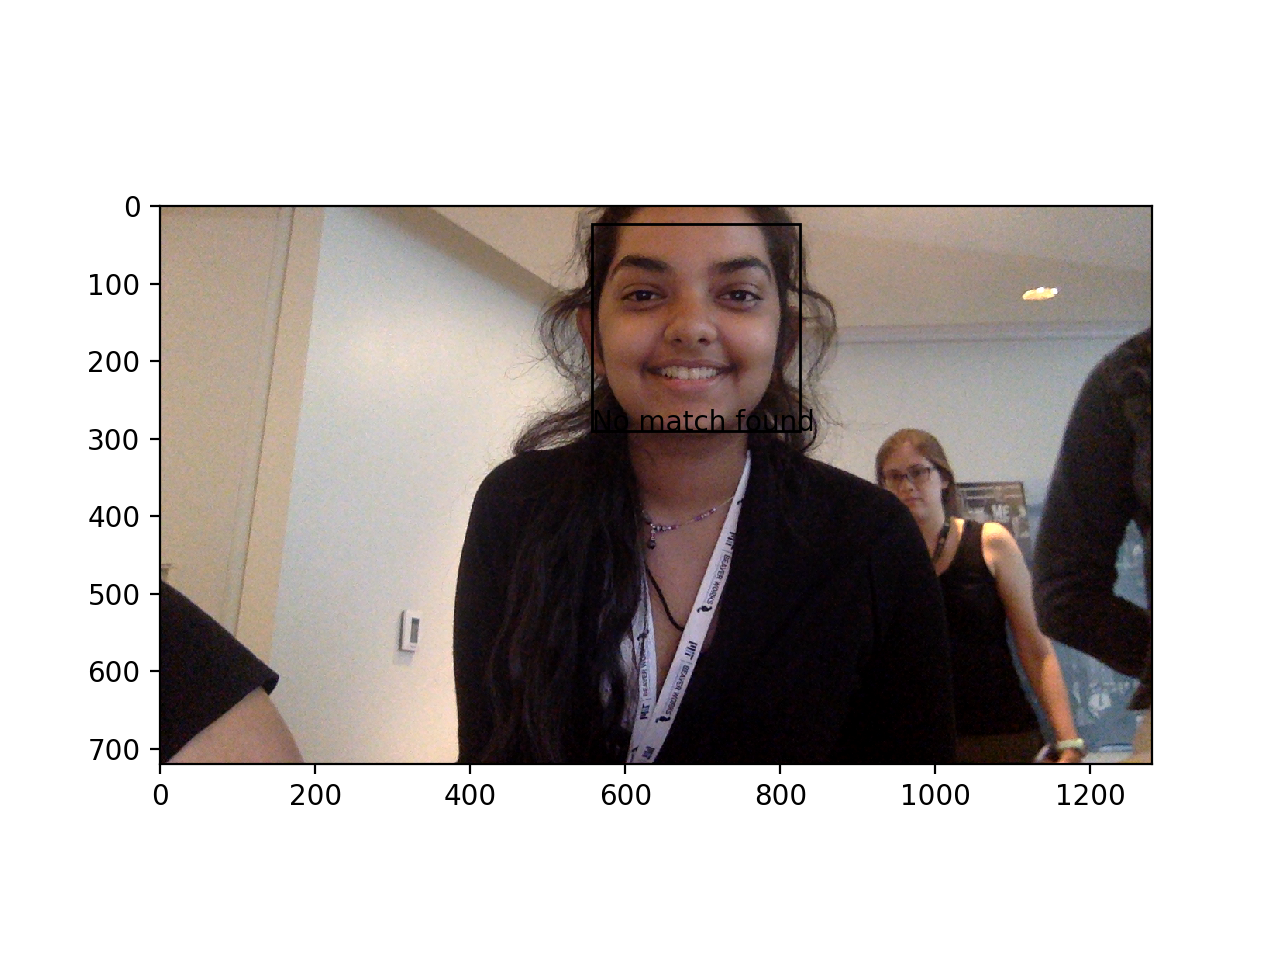

0.754114423142


In [73]:
c_desc = f.find_faces(f.take_picture(), d)[0]

In [74]:
d.update("Sanjana Cheerla", c_desc)

<IPython.core.display.Javascript object>


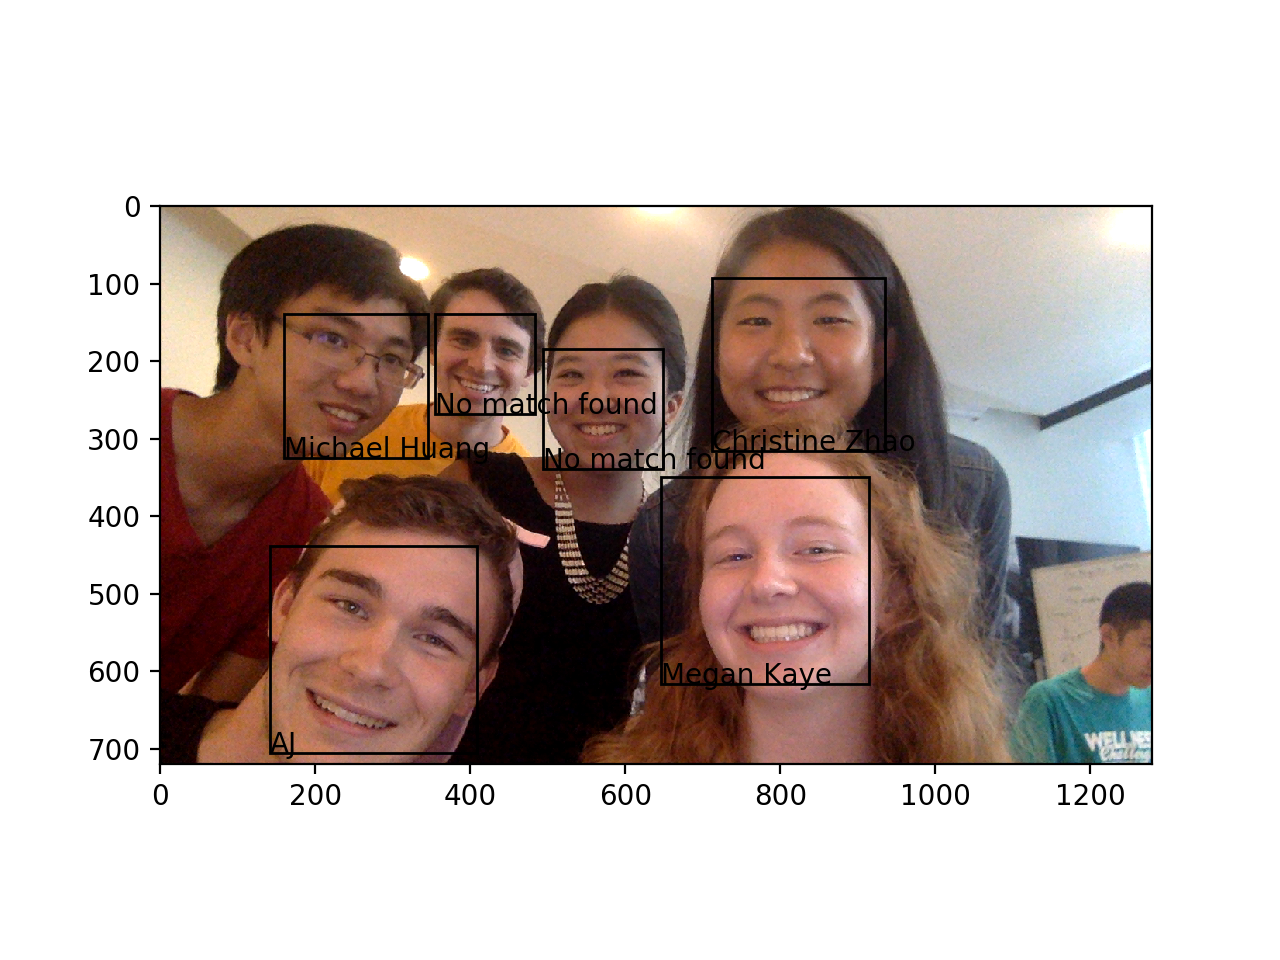

0.318229495558
0.518742563049
0.261464515714
0.259557738527
0.777505571352
0.319372776284


([array([-0.0564693 ,  0.052062  ,  0.08551334, -0.10377868, -0.12970319,
         -0.02852412, -0.01747102, -0.07276479,  0.10805689, -0.13336104,
          0.20667353, -0.09548117, -0.25697684,  0.03620887,  0.02440665,
          0.14503847, -0.18064542, -0.12765133, -0.03666822, -0.00284012,
          0.01031273,  0.04724203, -0.03909301,  0.05981944, -0.09254478,
         -0.34590942, -0.0838724 , -0.09211358, -0.0166382 ,  0.00757108,
          0.0474494 ,  0.12259517, -0.05406522,  0.03477542,  0.03491021,
          0.02016431, -0.13602738, -0.13649604,  0.22708555, -0.02582504,
         -0.25893831, -0.07782187,  0.09713774,  0.23745486,  0.19775289,
          0.00189445,  0.00832055, -0.07944886,  0.15163304, -0.34293666,
         -0.00861   ,  0.13912773,  0.06228664,  0.09901051,  0.08209566,
         -0.14025231,  0.10072385,  0.11363582, -0.26495558, -0.00573731,
          0.03630663, -0.14546862,  0.02180266, -0.08135285,  0.24930127,
          0.12764317, -0.1372467 , -0.

In [77]:
f.find_faces(f.take_picture(), d)

In [75]:
d.save_obj("goodfile.npy")

'successfully saved'

<IPython.core.display.Javascript object>


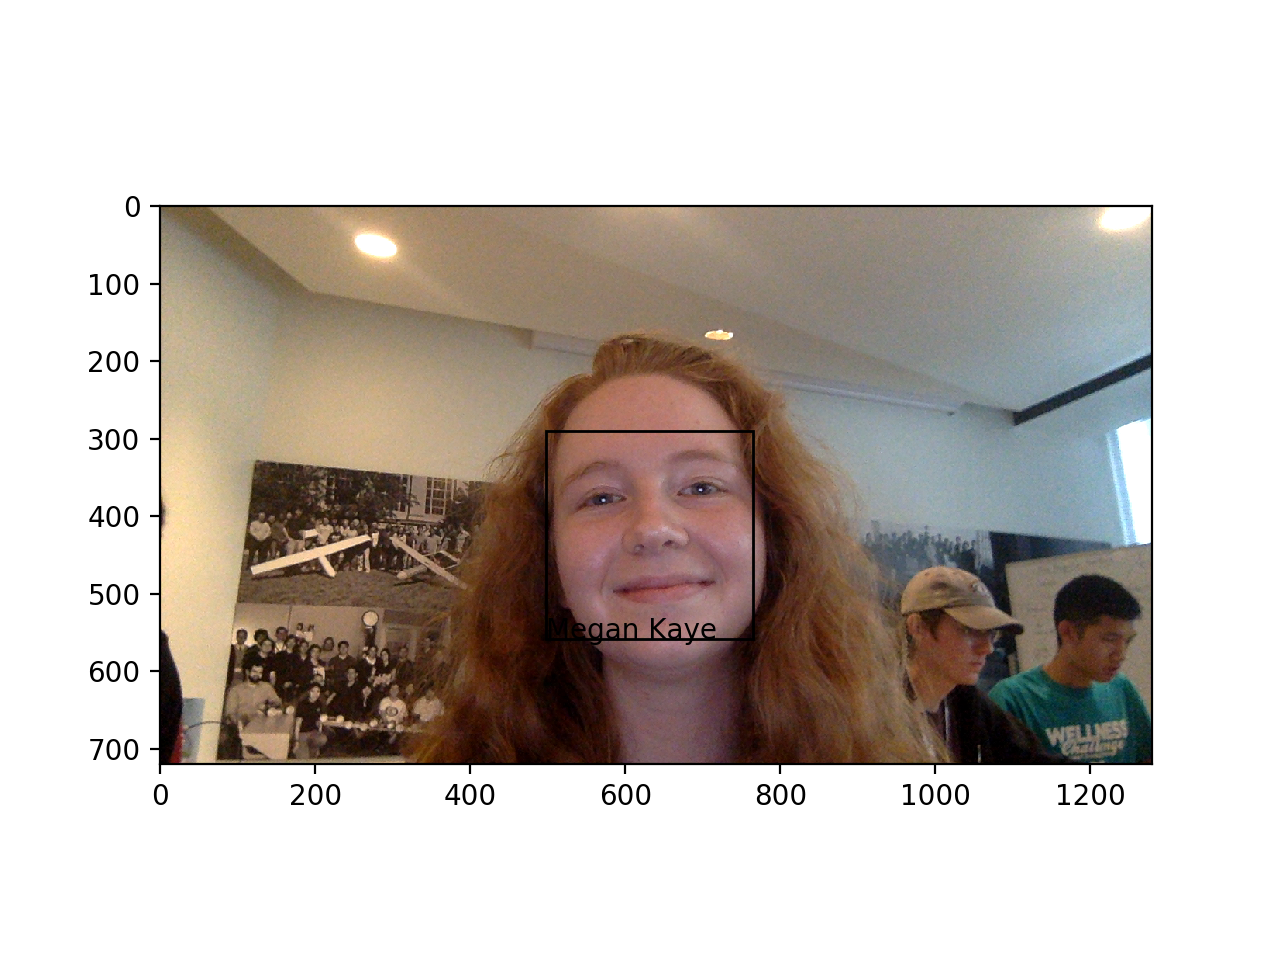

0.112824853834
[array([-0.0731321 ,  0.07080487,  0.10808402, -0.10956765, -0.11013588,
       -0.03362151,  0.00695322, -0.07706495,  0.14834613, -0.18855077,
        0.2328866 , -0.07383222, -0.24294262,  0.07812044,  0.02625224,
        0.16876826, -0.14012332, -0.10448136, -0.07702762, -0.01881096,
       -0.02882255,  0.02830946, -0.05248237,  0.09026771, -0.08722667,
       -0.33894867, -0.10136213, -0.06313804, -0.04281524,  0.04350187,
        0.01547867,  0.10908409, -0.07584593,  0.03541802,  0.0146775 ,
        0.03638516, -0.12655585, -0.11052724,  0.22370602,  0.0090171 ,
       -0.26419047,  0.03410729,  0.06599098,  0.27011713,  0.17328937,
        0.02936402,  0.01230324, -0.07603056,  0.14788626, -0.31672958,
        0.01443116,  0.15176353,  0.0916085 ,  0.07294322,  0.0534466 ,
       -0.12332462,  0.11232224,  0.08786311, -0.28601474,  0.01284963,
        0.08875316, -0.12153162,  0.01372671, -0.08319449,  0.24628334,
        0.17270622, -0.16727465, -0.05946295,  0

In [47]:
m = f.find_faces(f.take_picture(), d)[0]
print(m)

In [46]:
d.update("Megan Kaye",m)